# Optimization

Optimization problems are ubiquitous, be it humans unconsciously determining the shortest path while walking, to neural networks being trained to perform advanced tasks.
In this notebook, we will look at several classes of optimization problems and algorithms to solve them.

## I. Linear programming

Linear programming is a method to achieve the best outcome (such as maximum profit or lowest cost) in a mathematical model whose requirements are represented by linear relationships. It has revolutionized the way many problems are solved in various domains, which include food and agriculture, engineering, transportation, manufacturing and energy: https://sciencing.com/five-application-linear-programming-techniques-7789072.html


Let's look at a simple example, similar to the one in the lecture.

LPP Ltd produces two products X and Y. <br>
Material Constraint – Each unit of X consumes 3 kgs of raw material and each unit of Y consumes 2 kgs of material. Material availability is limited to 18 kgs.  <br>
Sales constraint – Maximum number units of X that can be sold is 4 and Maximum number units of Y that can be sold is 6. <br>
Profit – Each unit of X gives a profit of 3 Rs and each unit of Y gives a profit of 5 Rs. <br>
Find out how many units of X & Y should be produced in order to maximize profits.

Maximize – Z = 3x + 5y (Profit)
Subject to:
·      3x + 2y ≤ 18 (Material constraint)
·      x ≤ 4 (Sales constraint)
·      y ≤ 6 (Sales constraint)

__Question__: Write these constraintes as equations. 

<img src="linear_programming_image.jpg">

In [35]:
from scipy.optimize import linprog
c = [-3, -5]
A = [[3, 2], [1,0], [0,1]]
b = [18, 4, 6]

res = linprog(c, A_ub = A, b_ub = b, method='simplex')
print(res)

     fun: -36.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 2., 0.])
  status: 0
 success: True
       x: array([2., 6.])


## II. Traveling salesman

The travelling salesman problem falls in a different class of optimization, because we do not have a continuous function to optimize. 
TSP has a lot of applications, ...



In [17]:
### Import libraries
from KAIP3_optimization_helpers import *
import time
import matplotlib.pyplot as plt

### 1. Brute Force

One way to solve the TSP is to use brute force. That is, try every possible combination. 
First, how do we obtain the number of possible routes? Let's say we have 25 cities to visit. We first need to choose a starting city: we have 25 choices. Then for the second city, we only have 24 choices. Then 23 choices for the third, and so on so forth. <br>
The total number of choices is then N = 25 x 24 x 23 x ... x 1 = 25! <br>
Let's try a couple of examples. 

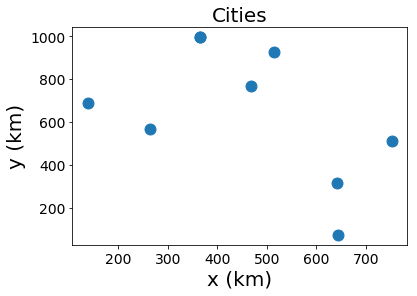

In [18]:
### Choose number of cities
n_cities = 8

city_list = generate_cities(n_cities)

plot_cities(city_list)

Brute force took 1.018768310546875 seconds to run.
The shortest route is ((366,995), (515,925), (469,766), (753,513), (643,315), (644,73), (265,568), (138,687)) which is 2359.677229655576km long.


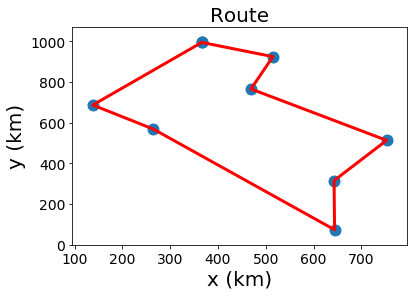

In [19]:
### Let's time how long it takes to run this 
start = time.time()

dist, route, counter = brute_force_tsp(city_list)

elapsed_time = time.time() - start

print("Brute force took " + str(elapsed_time) + " seconds to run." )
print("The shortest route is " + str(route) + " which is " + str(dist) + "km long.")

plot_route(route)

__Question__ : For different number of cities, how does the time of brute forcing vary?

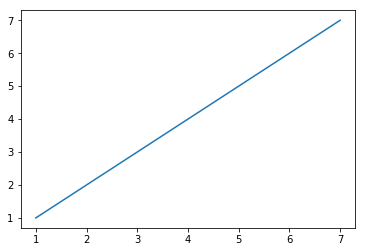

In [15]:
n_cities_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
run_times = []

plt.plot(run_times, n_cities_list)
plt.show()

### 2. Genetic algorithm



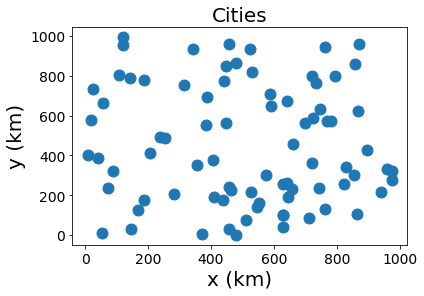

In [16]:
### Choose number of cities
n_cities = 80
city_list = generate_cities(n_cities)

plot_cities(city_list)

Initial distance: 38438.95968710028km
Final distance: 7727.622021877478km
Genetic algorithm took 408.46304512023926 seconds to run.
The shortest route is [(427,187), (376,114), (279,145), (293,334), (565,319), (557,251), (601,200), (647,197), (737,134), (733,95), (759,90), (854,12), (921,48), (966,317), (981,405), (960,248), (907,207), (916,168), (865,145), (851,214), (794,247), (762,256), (753,216), (659,303), (637,327), (767,436), (664,588), (663,657), (853,709), (973,651), (993,645), (812,590), (723,744), (739,765), (838,803), (821,934), (933,923), (892,984), (839,978), (809,974), (622,868), (482,940), (483,968), (431,990), (351,989), (308,999), (381,931), (362,912), (384,888), (321,889), (141,763), (160,780), (136,740), (110,729), (86,733), (266,822), (500,762), (488,695), (613,612), (599,631), (557,579), (561,510), (441,414), (452,429), (381,448), (332,411), (256,365), (84,448), (60,508), (18,318), (102,240), (70,172), (70,192), (20,101), (23,49), (186,49), (305,3), (297,36), (356

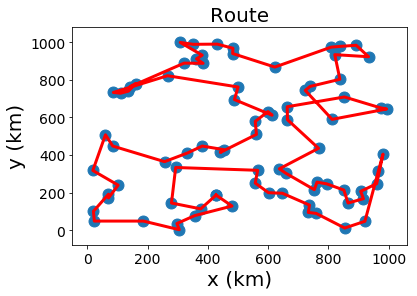

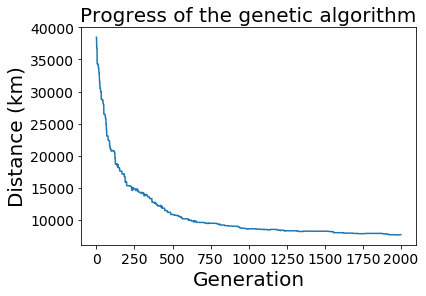

In [11]:
### Run the genetic algorithm

start = time.time()
best_route_GA, best_dist_GA, progress_GA = geneticAlgorithm(population=city_list, popSize=200, eliteSize=50, mutationRate=0.0005, generations=2000)
elapsed_time_GA = time.time() - start

print("Genetic algorithm took " + str(elapsed_time_GA) + " seconds to run." )
print("The shortest route is " + str(best_route_GA) + " which is " + str(best_dist_GA) + "km long.")

### Plot the best route
plot_route(best_route_GA)

### Plot the progress of the GA
plot_progress(progress_GA)
